In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
%matplotlib inline



In [2]:
#loading the dataset
dataset = pd.read_csv('Downloads/Advertising.csv')
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
#splitting the datset into train set and test set
X = dataset[['TV', 'radio', 'newspaper']]
y = dataset['sales'] 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
#multiple linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df 

y_pred = regressor.predict(X_test) 
print('',y_pred)


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

 [10.05739563  7.4522807   7.0197076  24.08029725 12.01786259  6.53793858
 12.78286918 15.10974587 10.76974013 16.34357951 22.88297477  9.12924467
 10.46455672 15.48743552 11.58555633 12.17296914 18.76551502 10.78318566
 15.90515992 17.30651279 24.06692057  9.59834224 15.13512211 12.38591525
  5.71360885 15.24749314 12.29402334 20.9421167  13.40991558  9.04348832
 12.89239415 21.40272028 18.13802209 21.17320803  6.56974433  6.14114206
  7.89018394 13.01541434 14.68953791  6.18835143]
 18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: sales, dtype: float64
Me

In [8]:

from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [9]:
%matplotlib inline
plt.style.use('seaborn-white')
advertising = pd.read_csv('Downloads/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


/home/pratiksha/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


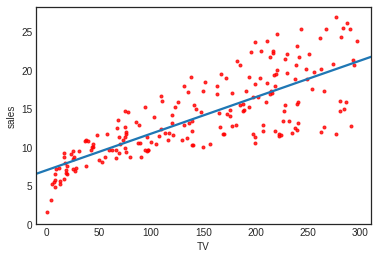

In [10]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);


In [11]:
#linear regression on advertising tv and sales 
regr = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

In [12]:
regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [13]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [14]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

In [15]:
((advertising.sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000


2.1025305831313514

In [16]:
#linear regression on adertising  on radio and sales
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [17]:
#linear regression on advertising on newspaper and sales
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [18]:
#summarising the results.

est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        10:07:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
est.rsquared

0.8972106381789522

In [20]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

In [21]:
X = scale(advertising.TV+advertising.newspaper+advertising.radio, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

In [22]:
regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04868788]


Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)